In [1]:
pip install ucimlrepo



 Árvore de Decisão:

Acurácia: 0.5385
Precisão: 0.2432
Revocação: 0.2656
F1-Score: 0.2489

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        48
           1       0.32      0.35      0.33        17
           2       0.00      0.00      0.00        12
           3       0.20      0.10      0.13        10
           4       0.00      0.00      0.00         4

    accuracy                           0.54        91
   macro avg       0.24      0.27      0.25        91
weighted avg       0.45      0.54      0.49        91



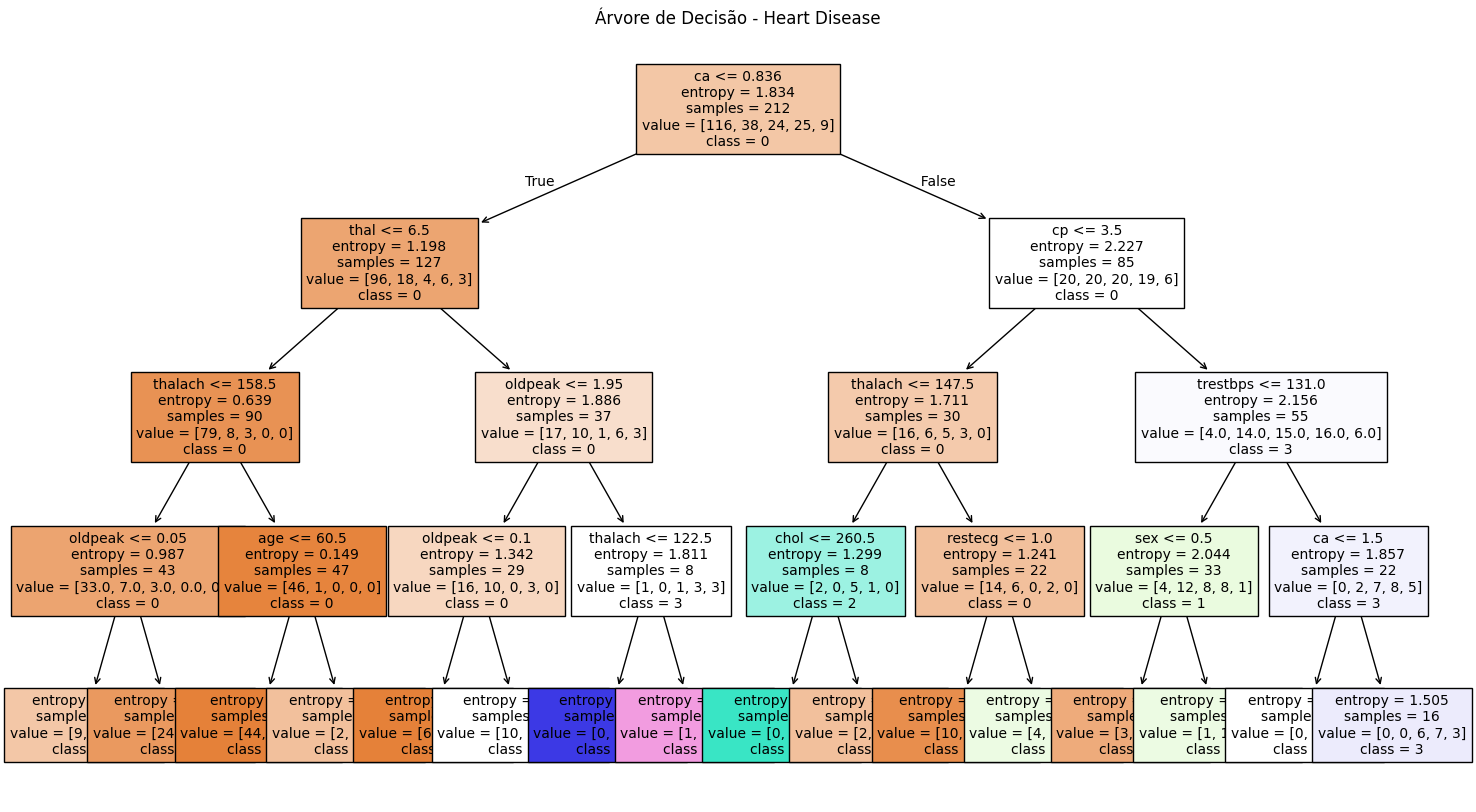


 Naive Bayes:

Acurácia: 0.4396
Precisão: 0.2178
Revocação: 0.3118
F1-Score: 0.2125

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        48
           1       0.11      0.06      0.08        17
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        10
           4       0.10      0.75      0.18         4

    accuracy                           0.44        91
   macro avg       0.22      0.31      0.21        91
weighted avg       0.49      0.44      0.45        91


 K-Nearest Neighbors (K=5):

Acurácia: 0.5824
Precisão: 0.3138
Revocação: 0.3198
F1-Score: 0.3137

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        48
           1       0.38      0.35      0.36        17
           2       0.27      0.25      0.26        12
           3       0.17      0.10      0.12       

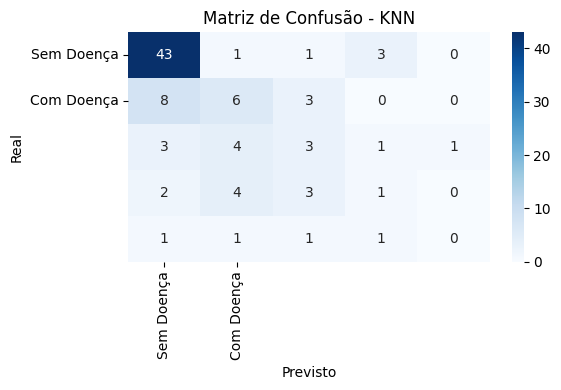

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# 1. CARREGAR A BASE (ID 45 = Heart Disease)
heart = fetch_ucirepo(id=45)
X = heart.data.features
y = heart.data.targets

target_col = y.columns[0]
if y[target_col].dtype == object or y[target_col].dtype.name == "category":
    le = LabelEncoder()
    y = le.fit_transform(y[target_col])
else:
    y = y[target_col].values
    le = LabelEncoder()
    y = le.fit_transform(y.ravel())

# 3. TRATAR VALORES AUSENTES
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 4. DIVIDIR DADOS EM TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para imprimir métricas
def print_metrics(y_true, y_pred):
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_true, y_pred, average='macro', zero_division=0):.4f}")
    print(f"Revocação: {recall_score(y_true, y_pred, average='macro', zero_division=0):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro', zero_division=0):.4f}")


# ALGORITMO - ÁRVORE DE DECISÃO

modelo_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
modelo_tree.fit(X_train, y_train)
y_pred_tree = modelo_tree.predict(X_test)

print("\n Árvore de Decisão:")
print()
print_metrics(y_test, y_pred_tree)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree, zero_division=0))

# Visualização da árvore
plt.figure(figsize=(18, 10))
plot_tree(modelo_tree, feature_names=X.columns, class_names=[str(c) for c in sorted(set(y))], filled=True, fontsize=10)
plt.title("Árvore de Decisão - Heart Disease")
plt.show()

# ALGORITMO - NAIVE BAYES

modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)

print("\n Naive Bayes:")
print()
print_metrics(y_test, y_pred_nb)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# ALGORITMO - K-Nearest Neighbors

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)
y_pred_knn = modelo_knn.predict(X_test_scaled)

print("\n K-Nearest Neighbors (K=5):")
print()
print_metrics(y_test, y_pred_knn)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn, zero_division=0))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Doença', 'Com Doença'], yticklabels=['Sem Doença', 'Com Doença'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
